# DBSCAN. Практика

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

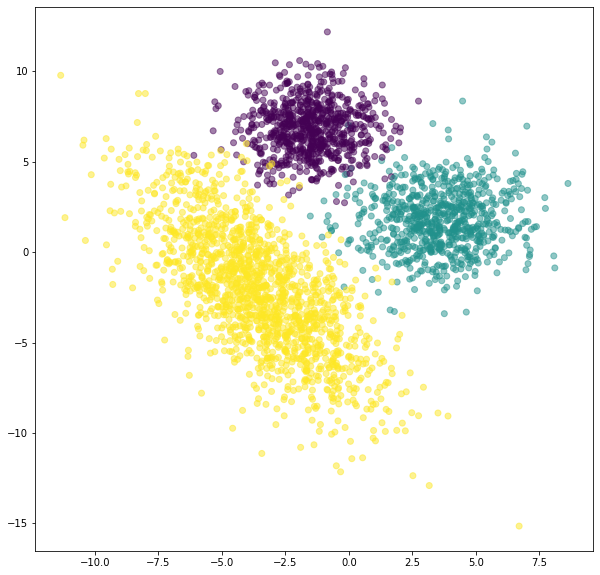

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма инициализруется так: 

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

В отличие от *k-means* и *AgglomerativeClustering*, класс *DBSCAN* не имеет параметра `n_clusters`, поскольку *DBSCAN* автоматически определяет число кластеров в выборке.

# Задание 8.2

Обучите модель *DBSCAN* с параметрами `eps=0.9` и `min_samples=35` на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что *DBSCAN* определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [7]:
dbscan = DBSCAN(
    eps=0.9,
    min_samples=35
)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [9]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

## Задание 8.3

Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [15]:
dict(zip(*np.unique(dbscan.labels_, return_counts=True)))[-1]

368

## Задание 8.4

Проверьте, как настройка параметров влияет на результат работы *DBSCAN*. Обучите модель *DBSCAN* с параметрами `eps=0.8` и `min_samples=35` на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [16]:
dbscan = DBSCAN(
    eps=0.8,
    min_samples=35
)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

In [17]:
dict(zip(*np.unique(dbscan.labels_, return_counts=True)))[-1]

583